In [1]:
dataset = 'flu'
alignment_file = 'NewYork.HA.2000-2003.nex'
date_guesser = lambda x: float(x.split('_')[-1])

In [2]:
import yaml
import os
import pathlib
import util
import templating

with open('data-config.yaml') as f:
    config = yaml.load(f)

util.do_seeding(config)
out_dir = pathlib.Path(config['out_dir']) / dataset
if not os.path.exists(out_dir):
    os.makedirs(out_dir)
build_templates = templating.TemplateBuilder(out_dir)
out_dir

/usr/lib/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  


PosixPath('out-data/flu')

In [6]:
config = util.update_dict(config, mutation_rate=3.5e-3)
config

{'beast_jar': 'lib/feast.jar',
 'lsd_executable': 'lsd',
 'relaxed_clock': False,
 'mutation_rate': 0.0035,
 'rate_sd': None,
 'chain_length': 2000000,
 'log_every': 1000,
 'estimate_clock_rate': False,
 'prior_params': {'pop_size': {'m': 2, 's': 2},
  'kappa': {'m': 1.0, 's': 1.25}},
 'init_values': {'clock_rate': 1.0, 'pop_size': 10, 'kappa': 2.0},
 'estimate_topology': True,
 'n_iter': 30000,
 'inference': 'mean_field',
 'burn_in': 0.1,
 'n_runs': 100,
 'out_dir': 'out-data',
 'datasets': {'dengue': 'Dengue4.env.nex', 'rsv2': 'RSV2.nex'},
 'seed': 1}

In [4]:
import Bio
import Bio.AlignIO
import numpy as np

data_dir = pathlib.Path('data')

with open(data_dir / alignment_file) as f:
    nexus = next(Bio.AlignIO.parse(f, format='nexus'))
    
n_nexus_taxa = len(nexus)
n_taxa = n_nexus_taxa

chosen_taxa = np.random.choice(n_nexus_taxa, size=n_taxa, replace=False)

sequence_dict = { record.name: str(record.seq) for i, record in enumerate(nexus) if i in chosen_taxa }

sequence_dict.keys(), len(sequence_dict)

(dict_keys(['NewYork_100_2002.08', 'NewYork_101_2002.12', 'NewYork_102_2002.08', 'NewYork_103_2002.09', 'NewYork_104_2002.07', 'NewYork_105_2002.12', 'NewYork_106_2002.07', 'NewYork_107_2002.06', 'NewYork_108_2002.1', 'NewYork_109_2002.1', 'NewYork_110_2002.1', 'NewYork_111_2002.12', 'NewYork_112_2002.1', 'NewYork_113_2002.1', 'NewYork_114_2002.19', 'NewYork_115_2002.12', 'NewYork_116_2002.1', 'NewYork_117_2002.11', 'NewYork_118_2002.1', 'NewYork_119_2002.1', 'NewYork_11_2003.85', 'NewYork_120_2002.16', 'NewYork_121_2002.18', 'NewYork_122_2002.24', 'NewYork_124_2001.93', 'NewYork_125_2002.06', 'NewYork_126_2002.18', 'NewYork_127_2002.02', 'NewYork_128_2002.09', 'NewYork_129_2002.14', 'NewYork_12_2003.97', 'NewYork_130_2002.21', 'NewYork_132_2002.09', 'NewYork_133_2002.12', 'NewYork_134_2002.03', 'NewYork_135_2002.14', 'NewYork_136_2002.23', 'NewYork_13_2003.88', 'NewYork_140_2000.01', 'NewYork_148_2000.13', 'NewYork_14_2003.94', 'NewYork_150_2000.09', 'NewYork_164_2000.01', 'NewYork_16

In [5]:
date_trait_dict = { taxon_name: date_guesser(taxon_name) for taxon_name in sequence_dict }
date_trait_string = ','.join(['{0}={1}'.format(name, date) for name, date in date_trait_dict.items()])
date_trait_dict, date_trait_string

({'NewYork_100_2002.08': 2002.08,
  'NewYork_101_2002.12': 2002.12,
  'NewYork_102_2002.08': 2002.08,
  'NewYork_103_2002.09': 2002.09,
  'NewYork_104_2002.07': 2002.07,
  'NewYork_105_2002.12': 2002.12,
  'NewYork_106_2002.07': 2002.07,
  'NewYork_107_2002.06': 2002.06,
  'NewYork_108_2002.1': 2002.1,
  'NewYork_109_2002.1': 2002.1,
  'NewYork_110_2002.1': 2002.1,
  'NewYork_111_2002.12': 2002.12,
  'NewYork_112_2002.1': 2002.1,
  'NewYork_113_2002.1': 2002.1,
  'NewYork_114_2002.19': 2002.19,
  'NewYork_115_2002.12': 2002.12,
  'NewYork_116_2002.1': 2002.1,
  'NewYork_117_2002.11': 2002.11,
  'NewYork_118_2002.1': 2002.1,
  'NewYork_119_2002.1': 2002.1,
  'NewYork_11_2003.85': 2003.85,
  'NewYork_120_2002.16': 2002.16,
  'NewYork_121_2002.18': 2002.18,
  'NewYork_122_2002.24': 2002.24,
  'NewYork_124_2001.93': 2001.93,
  'NewYork_125_2002.06': 2002.06,
  'NewYork_126_2002.18': 2002.18,
  'NewYork_127_2002.02': 2002.02,
  'NewYork_128_2002.09': 2002.09,
  'NewYork_129_2002.14': 2002.1

### Topology inference

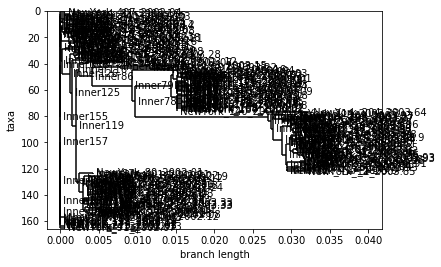

In [7]:
%matplotlib inline
import Bio.Phylo
import topology_inference

nj_tree = topology_inference.get_neighbor_joining_tree(sequence_dict)
Bio.Phylo.draw(nj_tree)

In [9]:
import subprocess

topology_inference.build_lsd_inputs(util.update_dict(config, n_taxa=n_taxa), build_templates, nj_tree, date_trait_string)
subprocess.run([config['lsd_executable']] + topology_inference.get_lsd_args(build_templates))

CompletedProcess(args=['lsd', '-c', '-r', 'a', '-i', 'out-data/flu/lsd-input.trees', '-d', 'out-data/flu/lsd-input.dates', '-w', 'out-data/flu/lsd-input.rates', '-o', 'out-data/flu/analysis-tree'], returncode=0)

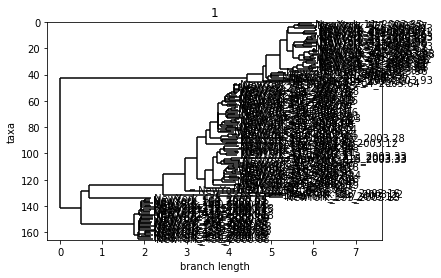

'((((((((((NewYork_11_2003.85:0.31505,NewYork_477_2003.9:0.36505):0.00866,NewYork_12_2003.97:0.44371):0.11523,(NewYork_268_2003.93:0.00107,NewYork_26_2003.94:0.01107):0.51786):0.13881,(((NewYork_3_2003.96:0.05100,NewYork_478_2003.91:0.00100):0.23979,NewYork_4_2003.96:0.29079):0.04015,NewYork_48_2003.96:0.33094):0.35680):0.01561,((((((((NewYork_271_2003.93:0.00100,NewYork_272_2003.93:0.00100):0.11212,NewYork_40_2003.95:0.13312):0.07767,NewYork_13_2003.88:0.14080):0.00100,NewYork_41_2003.96:0.22180):0.02398,NewYork_43_2003.96:0.24578):0.05647,NewYork_42_2003.96:0.30225):0.23300,((NewYork_1_2003.84:0.21083,NewYork_267_2003.93:0.30084):0.17738,NewYork_9_2003.85:0.39822):0.02703):0.02861,((((((NewYork_17_2003.9:0.00100,NewYork_20_2003.94:0.04100):0.03751,NewYork_23_2003.98:0.11851):0.00100,NewYork_475_2003.96:0.09951):0.08596,NewYork_476_2003.98:0.20547):0.12771,(((NewYork_19_2003.98:0.14438,NewYork_270_2003.9:0.06438):0.03447,NewYork_18_2003.94:0.13885):0.15333,NewYork_473_2003.92:0.27218)

In [10]:
import io


lsd_tree = topology_inference.extract_lsd_tree(build_templates)    
analysis_newick_io = io.StringIO()
Bio.Phylo.write([lsd_tree], analysis_newick_io, format='newick')
analysis_newick = analysis_newick_io.getvalue()
Bio.Phylo.draw(lsd_tree)
analysis_newick

## Variational analysis

In [ ]:
'abcd'[[1, 2, 3]]

In [28]:
import pandas as pd

sequence_df = pd.DataFrame({ key: list(value) for key, value in sequence_dict.items() })
sequence_df.apply(pd.value_counts).sum(axis=1)

A    94159.0
C    55888.0
G    63155.0
R        4.0
T    66963.0
W        1.0
dtype: float64

In [17]:
import newick
import variational_analysis
import pymc3 as pm
import pylo
import theano.tensor as tt

tree = newick.loads(analysis_newick)[0]
topology = pylo.topology.TreeTopology(tree)
sequence_dict_encoded = pylo.transform.encode_sequences(sequence_dict)
pattern_dict, pattern_counts = pylo.transform.group_sequences(sequence_dict_encoded)
pattern_counts = tt.as_tensor_variable(pattern_counts)
child_patterns = tt.as_tensor_variable(topology.build_sequence_table(pattern_dict))

grid_size = 9
cutoff = 5.0

with pm.Model() as model:
    precision = pm.Gamma('precision', alpha=0.001, beta=1.0/1000.0)
    innovations = pm.Normal('innovations', mu=0, tau=precision, shape=grid_size+1)
    pop_sizes = pm.Deterministic('pop_sizes', tt.cumsum(innovations))
    pop_func = pylo.tree.coalescent.GridPopulationFunction(topology, pop_sizes, cutoff, grid_size)
    tree_heights = pylo.tree.coalescent.CoalescentTree('tree', topology, pop_func, testval=topology.get_init_heights()[topology.node_mask])
    kappa = pm.Lognormal('kappa', **get_lognormal_params('kappa'))
    pi = pm.Dirichlet('pi', a=np.ones(4))
    substitution_model = HKYSubstitutionModel(kappa, pi)
    branch_lengths = topology.get_child_branch_lengths(tree_heights)
    distances = branch_lengths * config['mutation_rate']
    sequences = LeafSequences('sequences', topology, substitution_model, distances, child_patterns, pattern_counts)
    
    
for RV in model.basic_RVs:
    print(RV.name, RV.logp(model.test_point))
print('tree likelihood', model.fn(model.potentials[0])(model.test_point))
print('total', model.logp_nojac(model.test_point))

model.test_point

KeyError: 'R'

  0%|          | 0/30000 [00:00<?, ?it/s]/usr/lib/anaconda/lib/python3.6/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
/usr/lib/anaconda/lib/python3.6/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Average Loss = 13,720:   0%|          | 1/30000 [00:02<19:00:44,  2.28s/it]/usr/lib/anaconda/lib/python3.6/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequen

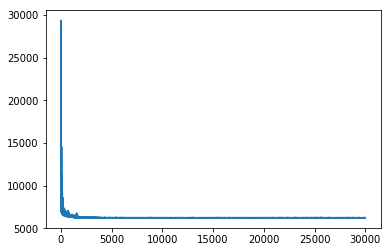

In [14]:
import pymc3 as pm
import pickle
import matplotlib.pyplot as plt

inference = variational_analysis.construct_inference(config, model)
tracker = pm.callbacks.Tracker(
   mu=inference.approx.shared_params['mu'].eval,
   rho=inference.approx.shared_params['rho'].eval
)

approx = inference.fit(config['n_iter'], callbacks=[tracker], obj_optimizer=pm.adam(learning_rate=0.01))

plt.plot(approx.hist)

In [24]:
inference.fit(1000)

Problem occurred during compilation with the command line below:
/usr/bin/g++ -shared -g -O3 -fno-math-errno -Wno-unused-label -Wno-unused-variable -Wno-write-strings -march=broadwell -mmmx -mno-3dnow -msse -msse2 -msse3 -mssse3 -mno-sse4a -mcx16 -msahf -mmovbe -maes -mno-sha -mpclmul -mpopcnt -mabm -mno-lwp -mfma -mno-fma4 -mno-xop -mbmi -mbmi2 -mno-tbm -mavx -mavx2 -msse4.2 -msse4.1 -mlzcnt -mrtm -mhle -mrdrnd -mf16c -mfsgsbase -mrdseed -mprfchw -madx -mfxsr -mxsave -mxsaveopt -mno-avx512f -mno-avx512er -mno-avx512cd -mno-avx512pf -mno-prefetchwt1 -mclflushopt -mxsavec -mxsaves -mno-avx512dq -mno-avx512bw -mno-avx512vl -mno-avx512ifma -mno-avx512vbmi -mno-clwb -mno-pcommit -mno-mwaitx --param l1-cache-size=32 --param l1-cache-line-size=64 --param l2-cache-size=3072 -mtune=generic -DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -m64 -fPIC -I/usr/lib/anaconda/lib/python3.6/site-packages/numpy/core/include -I/usr/lib/anaconda/include/python3.6m -I/usr/lib/anaconda/lib/python3.6/site-package

OSError: [Errno 22] Invalid argument

In [17]:
variational_trace = approx.sample()

(array([  3.,   9.,  27.,  62., 105., 140.,  80.,  47.,  22.,   5.]),
 array([126.87680936, 131.23207603, 135.58734271, 139.94260938,
        144.29787606, 148.65314273, 153.00840941, 157.36367609,
        161.71894276, 166.07420944, 170.42947611]),
 <a list of 10 Patch objects>)

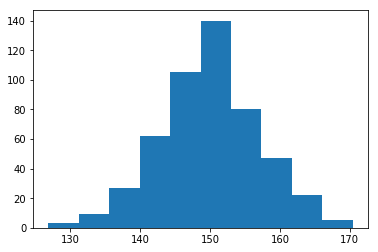

In [18]:
plt.hist(variational_trace.get_values('tree')[:, -1])

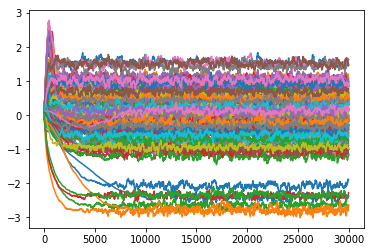

In [23]:
plt.plot(np.stack(tracker.hist['rho']));

(array([ 20.,  35.,  94., 105.,  98.,  84.,  36.,  18.,   7.,   3.]),
 array([234.18189313, 248.571916  , 262.96193887, 277.35196174,
        291.7419846 , 306.13200747, 320.52203034, 334.91205321,
        349.30207608, 363.69209895, 378.08212182]),
 <a list of 10 Patch objects>)

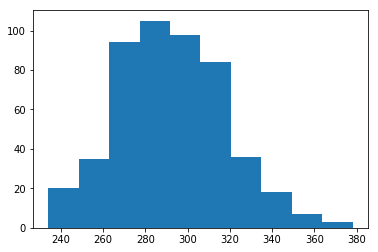

In [19]:
plt.hist(variational_trace.get_values('pop_size'))

In [20]:
with open(build_templates.pymc_analysis_result_path, 'wb') as f:
     pickle.dump(tracker, f)

In [21]:
with open(build_templates.out_path / 'pymc_approx.pickle', 'wb') as f:
    pickle.dump(approx, f)